In [1]:
# extract dataset
from zipfile import ZipFile

dataset = "dogs-vs-cats.zip"

with ZipFile(dataset, 'r') as zip:
    zip.extractall()

In [2]:
# extract dataset
from zipfile import ZipFile

dataset = "train.zip"

with ZipFile(dataset, 'r') as zip:
    zip.extractall()

In [3]:
# counting the number of files
import os
path, dirs, files = next(os.walk('train'))
file_count = len(files)
print("total gambar", file_count)

file_names = os.listdir('train')

total gambar 25000


In [4]:
# import dependencies
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2

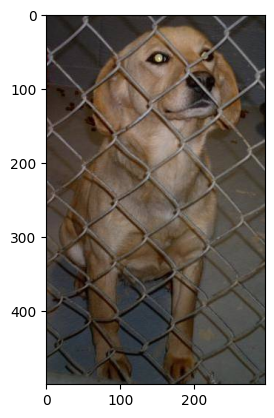

In [5]:
# display dog image
img = mpimg.imread('train/dog.5949.jpg')
imgplt = plt.imshow(img)
plt.show()

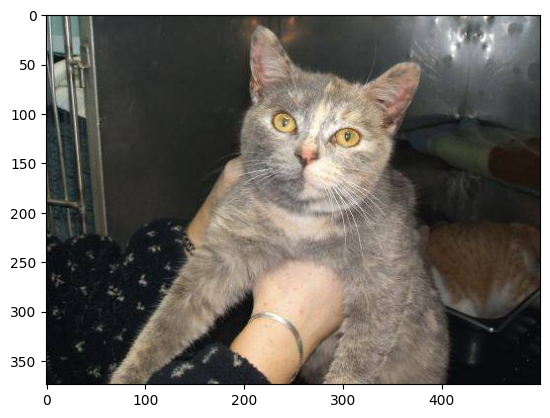

In [6]:
# display cat image
img = mpimg.imread('train/cat.5949.jpg')
imgplt = plt.imshow(img)
plt.show()

In [7]:
# make new folder
os.mkdir('train resized')

In [8]:
# resize image
original_folder = 'train/'
resized_folder = 'train resized/'

dog_count = 0
cat_count = 0

for i in range(len(os.listdir(original_folder))):
    file_name = os.listdir(original_folder)[i]
    
    if file_name[0:3] == 'cat' :
        cat_count += 1
        if cat_count <= 1000 :
            img_path = original_folder+file_name
            img = Image.open(img_path)
            img = img.resize((224, 224))
            img = img.convert('RGB')

            newImgPath = resized_folder+file_name
            img.save(newImgPath)
    else :
        dog_count += 1
        if dog_count <= 1000 :
            img_path = original_folder+file_name
            img = Image.open(img_path)
            img = img.resize((224, 224))
            img = img.convert('RGB')

            newImgPath = resized_folder+file_name
            img.save(newImgPath)

    if dog_count >= 1000 and cat_count >= 1000:
        break

print(dog_count, cat_count)

1000 12500


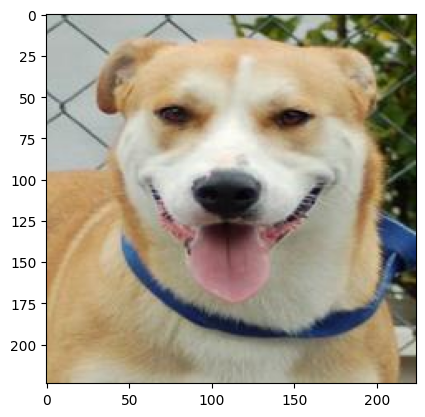

In [9]:
# display resized dog image
img = mpimg.imread('train resized/dog.1034.jpg')
imgplt = plt.imshow(img)
plt.show()

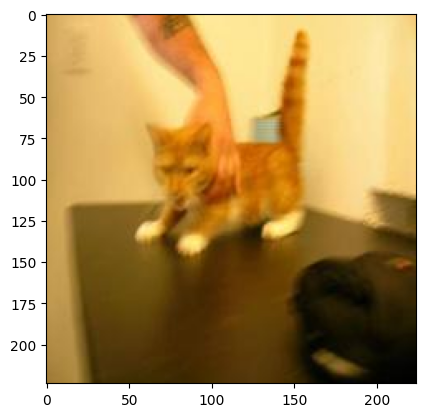

In [10]:
# display resized cat image
img = mpimg.imread('train resized/cat.0.jpg')
imgplt = plt.imshow(img)
plt.show()

In [11]:
# labeling resized image dog = 1, cat = 0
labels = []
file_names = os.listdir('train resized')

for i in range(len(file_names)):
    file_name = file_names[i]
    label = file_name[0:3]
    
    if label == 'dog':
        labels.append(1)
    else :
        labels.append(0)
        
print(labels[0:5])
print(file_names[0:5])

[0, 0, 0, 0, 0]
['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']


In [12]:
# convert resized image to numpy arrays
import cv2
import glob

image_dir = 'train resized/*.*'

files = []

files.extend(glob.glob(image_dir))

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

print(dog_cat_images.shape)
type(dog_cat_images)

(2000, 224, 224, 3)


numpy.ndarray

In [13]:
X = dog_cat_images
Y = np.asarray(labels)

In [14]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [15]:
# 1600 training 
# 400 test

In [16]:
# scaling the data
x_train_scaled = X_train/255
x_test_scaled = X_test/255

In [17]:
# build neural network
import tensorflow as tf
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [18]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [19]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [20]:
model.fit(x_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 21s 338ms/step - loss: 0.2196 - acc: 0.9025
Epoch 2/5
50/50 [==============================] - 17s 344ms/step - loss: 0.0779 - acc: 0.9750
Epoch 3/5
50/50 [==============================] - 18s 363ms/step - loss: 0.0561 - acc: 0.9837
Epoch 4/5
50/50 [==============================] - 17s 346ms/step - loss: 0.0467 - acc: 0.9850
Epoch 5/5
50/50 [==============================] - 17s 349ms/step - loss: 0.0385 - acc: 0.9894


In [21]:
score, acc = model.evaluate(x_test_scaled, Y_test)
print("Score : ", score)
print("Accuracy : ", acc)

13/13 [==============================] - 5s 328ms/step - loss: 0.0695 - acc: 0.9700
Score :  0.06949766725301743
Accuracy :  0.9699999690055847


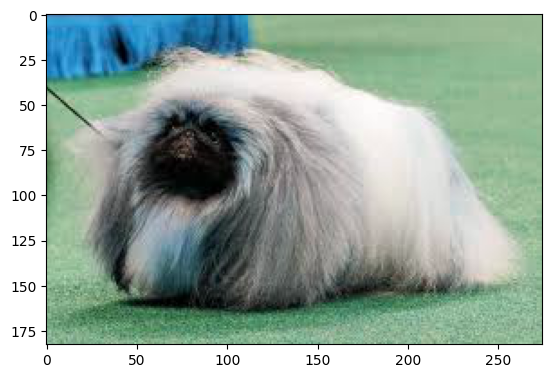

1/1 [==============================] - 1s 740ms/step
[[0.88443905 0.49924627]]
0
Cat


In [22]:
# predictive system
input_image_path = "test.jpg"
input_image = cv2.imread(input_image_path)

imgplt = plt.imshow(input_image)
plt.show()

input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)
print(input_prediction)

input_prod_label = np.argmax(input_prediction)
print(input_prod_label)

if input_prod_label == 0 :
    print('Cat')
else :
    print('Dog')